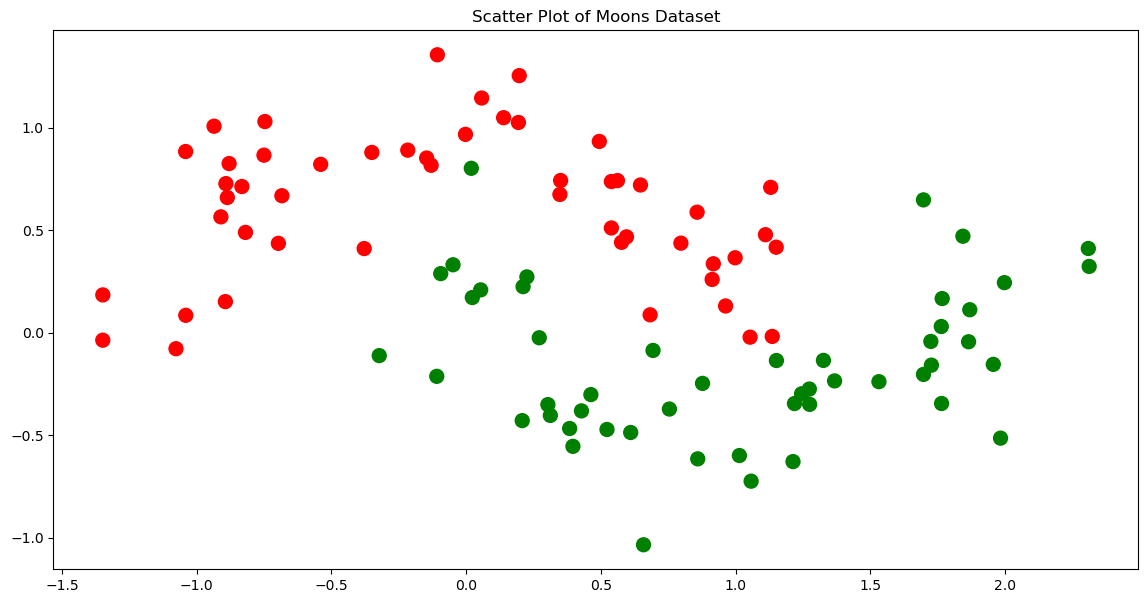

C:\Users\Lalit\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


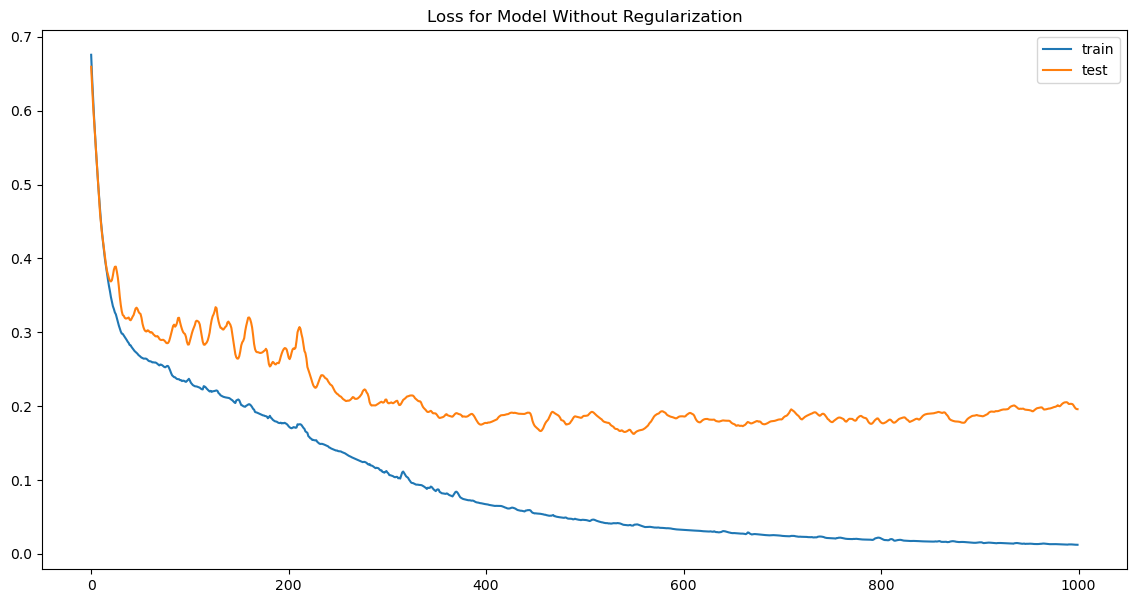

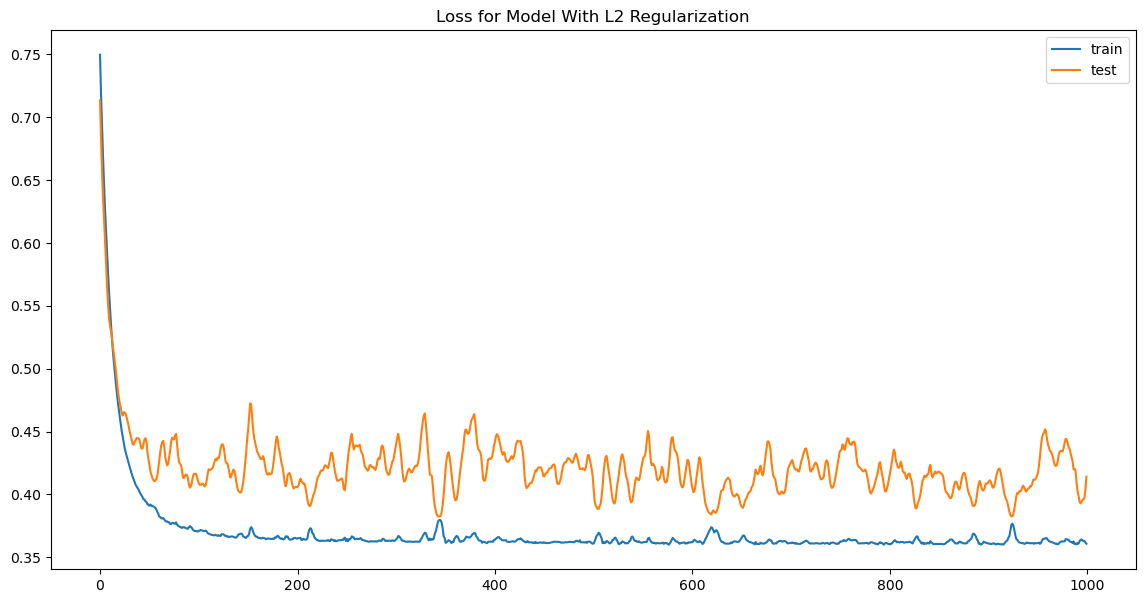

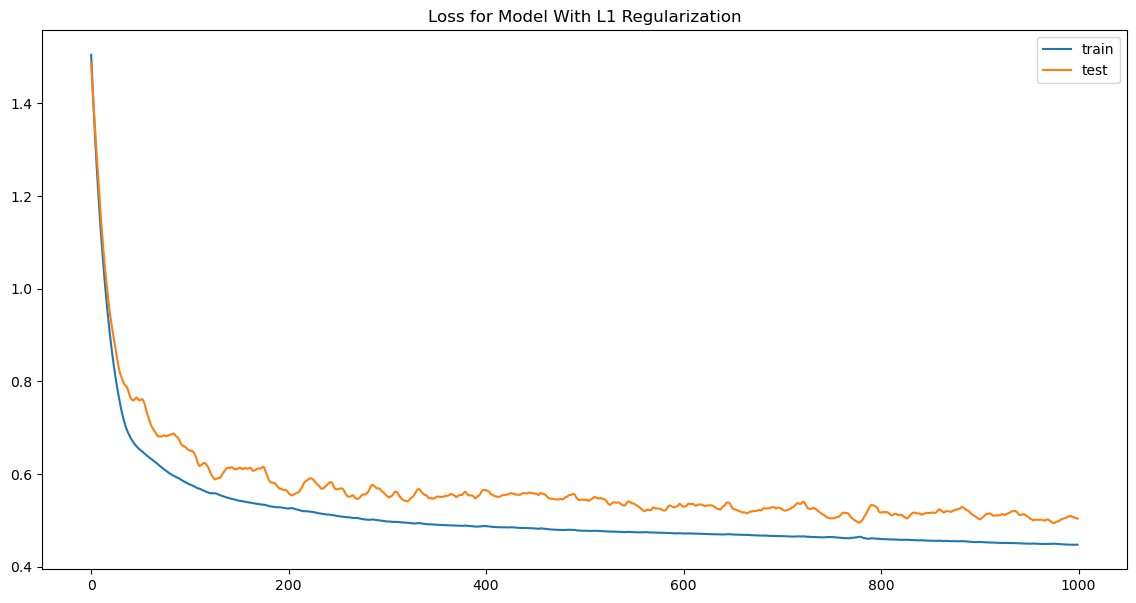

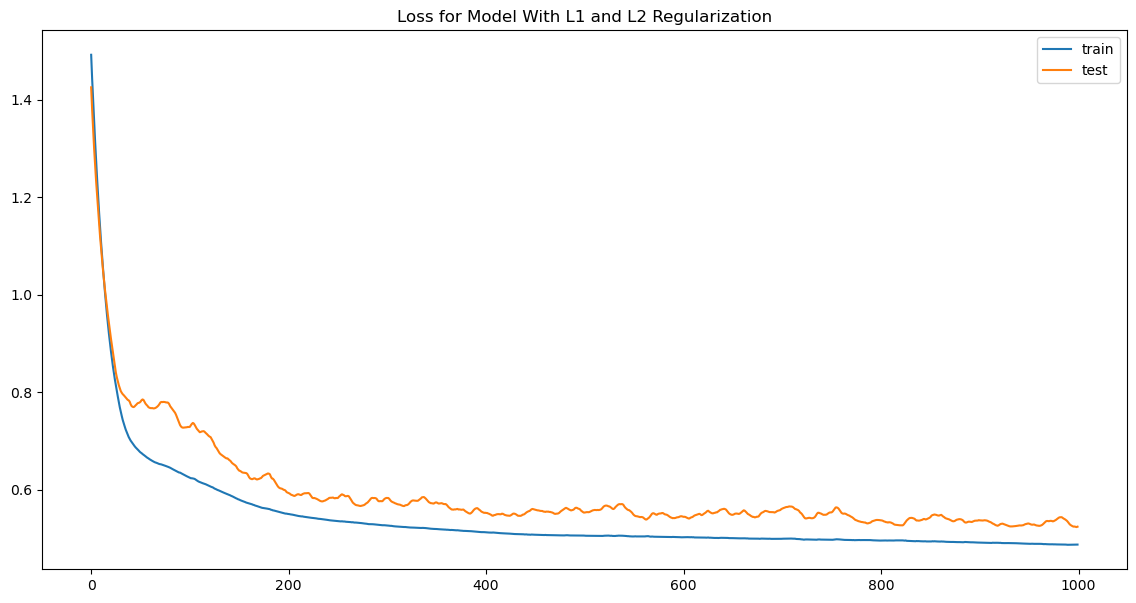

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

np.random.seed(800)

# Generating synthetic data
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
zero_one_colourmap = ListedColormap(('red', 'green'))
rcParams['figure.figsize'] = 14, 7
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=zero_one_colourmap)
plt.title("Scatter Plot of Moons Dataset")
plt.show()  # Display scatter plot

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Model without regularization
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=0)

# Plotting loss for the model without regularization
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title("Loss for Model Without Regularization")
plt.legend()
plt.show()  # Display loss plot

# Model with L2 regularization
l2_model = Sequential()
l2_model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
l2_model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))
l2_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

l2_history = l2_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=0)

# Plotting loss for the model with L2 regularization
plt.plot(l2_history.history['loss'], label='train')
plt.plot(l2_history.history['val_loss'], label='test')
plt.title("Loss for Model With L2 Regularization")
plt.legend()
plt.show()  # Display loss plot

# Model with L1 regularization
l1_model = Sequential()
l1_model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
l1_model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l1(0.01)))
l1_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

l1_history = l1_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=0)

# Plotting loss for the model with L1 regularization
plt.plot(l1_history.history['loss'], label='train')
plt.plot(l1_history.history['val_loss'], label='test')
plt.title("Loss for Model With L1 Regularization")
plt.legend()
plt.show()  # Display loss plot

# Model with L1_L2 regularization
l1_l2_model = Sequential()
l1_l2_model.add(Dense(500, input_dim=2, activation='relu',
                      kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
l1_l2_model.add(Dense(1, activation='sigmoid',
                      kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
l1_l2_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

l1_l2_history = l1_l2_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=0)

# Plotting loss for the model with L1_L2 regularization
plt.plot(l1_l2_history.history['loss'], label='train')
plt.plot(l1_l2_history.history['val_loss'], label='test')
plt.title("Loss for Model With L1 and L2 Regularization")
plt.legend()
plt.show()  # Display loss plot
